# Modeling in Finance

For each question below, write code to solve the problem iteratively.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

Suppose I purchase a car for $\$40,000$, make a down payment of $\$5,000$, and have an annual percentage rate (APR) of 12% on the loan. If my monthly car payment is $\$500$ per month and interest is compounded monthly, how long will it take to pay off the loan and what will be the total amount paid for the car?

After t = 10.1 years, P = $-0.86 and the total interest paid = $25499.14.


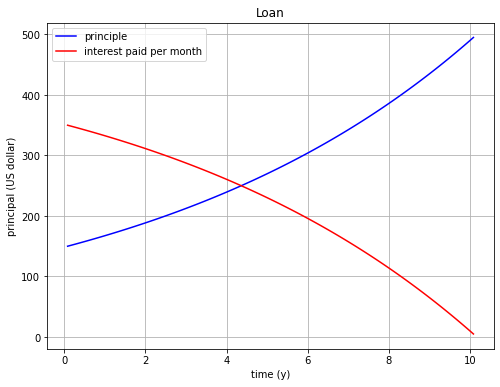

In [2]:
P = 35000 # principal
r = 0.12 # interest rate
dt = 1/12 # time step in years
t = 0
Itotal = 0

tdata = []
Pdata = []
Idata = []

while P > 0:
    I = r*P*dt # interest paid for one month
    Ppaid = 500 - I
    P  = P - Ppaid
    Itotal = Itotal + I

    t = t + dt

    tdata.append(t)
    Pdata.append(Ppaid)
    Idata.append(I)

print("After t = {:.1f} years, P = ${:.2f} and the total interest paid = ${:.2f}.".format(t, P, Itotal))

fig = plt.figure(figsize=(8,6))
plt.title("Loan")
plt.xlabel('time (y)')
plt.ylabel('principal (US dollar)')
plt.plot(tdata, Pdata, 'b-', label = 'principal')
plt.plot(tdata, Idata, 'r-', label = 'interest paid per month')
plt.legend()
plt.grid(which='both', axis='both')
plt.show()

# Exercise 2

You buy a house and take out a $\$300,000$ loan to be paid over 30 years with a 5% annual percentage rate, compounded monthly.

  1. What is your monthly payment?
  2. Financial advisors recommend making a 13th payment at the end of each year, all of which is applied to the principal of the loan. If you do this, how long will it take to pay off the loan and how much money will you save?

The program below was used to find the monthly payment.

After t = 30.00 years, P = $-445.37 and the total interest paid = $279514.63.


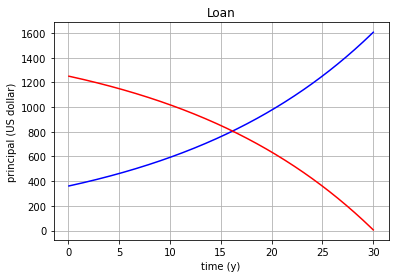

In [4]:
P = 300000
r = 0.05
dt = 1/12
t = 0
Itotal = 0

tdata = []
Pdata = []
Idata = []

month = 0

while t<29.99:
    I = r *P*dt #interest paid for one month
    Ppaid = 1611 - I
    P  = P - Ppaid
    Itotal = Itotal + I

    t = t + dt
    month = month + 1

    tdata.append(t)
    Pdata.append(Ppaid)
    Idata.append(I)

print("After t = {:.2f} years, P = ${:.2f} and the total interest paid = ${:.2f}.".format(t, P, Itotal))

fig = plt.figure()
plt.title("Loan")
plt.xlabel('time (y)')
plt.ylabel('principal (US dollar)')
plt.plot(tdata, Pdata, 'b-')
plt.plot(tdata, Idata, 'r-')
plt.grid(which='both', axis='both')
plt.show()

The program below applies an additional payment of $1611 to the principal.

After t = 25.42 years, P = $-1088.24 and the total interest paid = $230541.76.


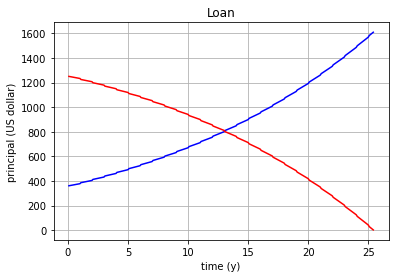

In [5]:
P = 300000
r = 0.05
dt = 1/12
t = 0
Itotal = 0

tdata = []
Pdata = []
Idata = []

month = 0

while P>0:
    I = r *P*dt #interest paid for one month
    Ppaid = 1611 - I
    P  = P - Ppaid
    Itotal = Itotal + I

    t = t + dt
    month = month + 1

    if month>11:
      P = P - 1611
      month = 0

    tdata.append(t)
    Pdata.append(Ppaid)
    Idata.append(I)

print("After t = {:.2f} years, P = ${:.2f} and the total interest paid = ${:.2f}.".format(t, P, Itotal))

fig = plt.figure()
plt.title("Loan")
plt.xlabel('time (y)')
plt.ylabel('principal (US dollar)')
plt.plot(tdata, Pdata, 'b-')
plt.plot(tdata, Idata, 'r-')
plt.grid(which='both', axis='both')
plt.show()

# Exercise 3

This is an open-ended question that requires you to make assumptions, and making assumptions is an integral part of *modeling*.

You are evaluating your retirement. At 25 years old, you invest monthly into an IRA (Individual Retirement Account) with an average 7% interest rate per year. After your retirement age, you want to live solely on that investment. What is the minimum age you can retire if you die with exactly zero dollars left in your investment?

1. Talk to your classmates and write a list of assumptions you will make. At first, it's best to keep your assumptions simple, yet realistic.

2. Describe in words (an outline form is fine) what calculations your code must do. This is called *pseudocode*. You are describing the logic but not writing code.

3. After discussion, write code to solve the problem. Keep it simple and check that it works along the way. Define variables needed and use variables in your calculations. This allows you to explore your model by adjusting the values of the variables.

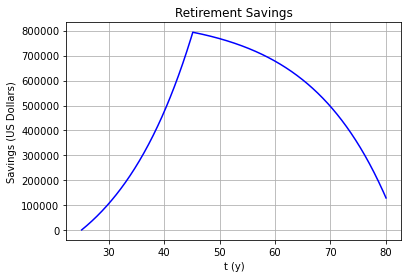

Total amount of money at death =  129580.61829988129


In [6]:
P_invest = 1500 #retirment savings per month
P_spend = 0 #how much you spend out of retirement per month
age_death = 80
monthly_expenses = 5000 #money you pull out of savings after retirement
r = 0.07 #interest rate per year

t = 25
dt = 1/12

age_retire = 45.1

P = 0

tdata = []
Pdata = []

while t < age_death:

  if t>age_retire:
    P_invest = 0 #stop depositing into your retirement account
    P_spend = monthly_expenses #start withdrawing out of your retirement account

  I = r*P*dt
  P = P + I + P_invest - P_spend
  t = t + dt

  tdata.append(t)
  Pdata.append(P)

plt.figure()
plt.title("Retirement Savings")
plt.xlabel("t (y)")
plt.ylabel("Savings (US Dollars)")
plt.plot(tdata,Pdata,'b-')
plt.grid(which='both', axis='both')
plt.show()

print("Total amount of money at death = ", P)

# Exercise 4

How can you make your model in Excercise 3 more realistic? Choose one way to modify the model. Describe the modification to your model, and describe the difference in the predictions before and after you changed the model.

If your monthly salary increases, then the amount you invest per month in your retirement account also increases. Suppose your salary increases at 2% per year. Then, the amount you can save in retirement might increase at the same rate. Using the values in the previous program, we can find the new retirement age.

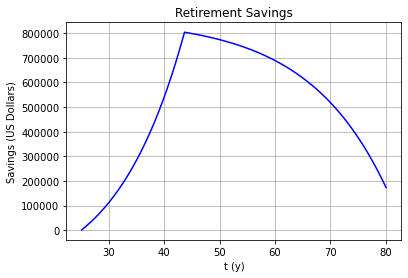

Total amount of money at death =  173462.1015955437


In [7]:
P_invest = 1500 #retirment savings per month
r_invest = 0.02 #retirement savings increase per year
P_spend = 0 #how much you spend out of retirement per month
age_death = 80
monthly_expenses = 5000 #money you pull out of savings after retirement
r = 0.07 #interest rate per year

t = 25
dt = 1/12

age_retire = 43.6

P = 0

tdata = []
Pdata = []

while t < age_death:

  if t>age_retire:
    P_invest = 0 #stop depositing into your retirement account
    P_spend = monthly_expenses #start withdrawing out of your retirement account

  P_invest = P_invest + r_invest*P_invest*dt #increase the investment with an average growth rate r_invest

  I = r*P*dt
  P = P + I + P_invest - P_spend
  t = t + dt

  tdata.append(t)
  Pdata.append(P)

plt.figure()
plt.title("Retirement Savings")
plt.xlabel("t (y)")
plt.ylabel("Savings (US Dollars)")
plt.plot(tdata,Pdata,'b-')
plt.grid(which='both', axis='both')
plt.show()

print("Total amount of money at death = ", P)

With a constant investment amount per month, retirement age is 45.1 years old. With a 2% increase per year in the amount saved in a retirement account (compounded monthly), the retirement age is 43.6 years old. Accounting for the 2% increase in savings per month results in a decrease of 1.5 years in the minimum retirement age.